# Spatial Filtering

* We use spatial filtering to enhance images, e.g: noise filtering. 
* We can use the same technique to locate objects in images, called template matching.
* In an intensity transformation, we apply a function to each pixel independently. In spatial filtering, we apply a function to a neighborhood of each pixel.
* The function is called a kernel or mask. It is a small matrix that slides over the image.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
image_dir = Path("images")

### Average filtering

This is the simplest spatial filter. It replaces each pixel with the average of its neighborhood. The neighborhood is defined by the kernel. The kernel is a square matrix with odd dimensions. The dimensions are usually $3\times 3$, $5\times 5$, $7\times 7$, etc. The kernel is placed on top of the image, and the center of the kernel is placed on top of the pixel. The pixel is replaced by the average of the pixels in the kernel. This effectively blurs the image.

All averaging kernels sum to 1. This is to avoid changing the brightness of the image.

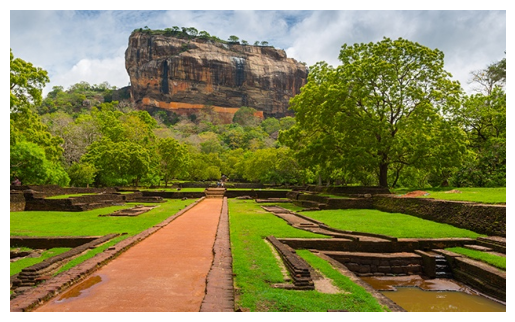

In [4]:
image = cv2.imread(str(image_dir/"sigiriya.jpg"))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis("off")
plt.show()

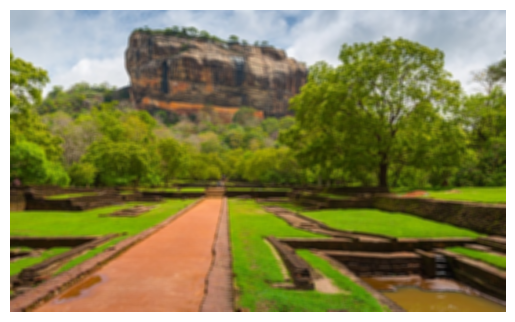

In [7]:
kernel = np.ones((5,5), np.float32)/25
blurred_image = cv2.filter2D(src = image, ddepth = -1, kernel = kernel) # ddepth = -1 sets the output depth same as the input depth
plt.imshow(blurred_image)
plt.axis("off")
plt.show()

### Sobel filtering

Sobel filtering is used to detect edges in images. It uses two kernels, one for the horizontal direction and one for the vertical direction. The horizontal kernel detects vertical edges, and the vertical kernel detects horizontal edges. The kernels are applied to the image, and the results are combined to detect edges.

The kernels are:

$ \begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1 
\end{bmatrix}  $

for the X-direction (vertical edges) and

$ \begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1 
\end{bmatrix}  $

for the Y-direction (horizontal edges).

### Prewitt Kernel

The Prewitt kernels can also be used for edge detection. These are more sensitive to noise while Sobel is less sensitive to noise

The kernels are

$ \begin{bmatrix} 
-1 & 0 & 1 \\ 
-1 & 0 & 1 \\ 
-1 & 0 & 1 \end{bmatrix} $

for the vertical edges and

$\begin{bmatrix} 
-1 & -1 & -1 \\ 
0 & 0 & 0 \\ 
1 & 1 & 1 
\end{bmatrix}$

for the horizontal edges

### Derivative of Gaussian Kernel

The derivative of Gaussian kernel is used for edge detection. It is smoother than the Sobel kernel.

The Gaussian distribution is given by:

$$ G(x, y) = \frac{1}{2\pi\sigma^2} e^{\frac{-(x^2 + y^2)}{2\sigma^2}} $$

We compute this and take the derivative with respect to $x$ and $y$ to get the kernels.

The derivative of Gaussian smoothes the imgae and applies edge detection. It is smoother than the Sobel kernel. Additionally, by tuning the $\sigma$ parameter, we can control the amount of smoothing and also smooth at different scales.

uint8
255 0


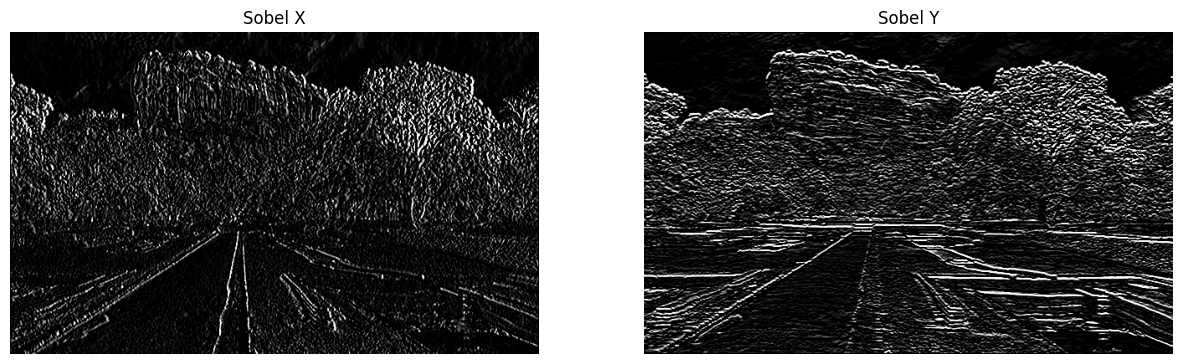

In [8]:
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
print(image.dtype)
sobel_x_filtered = cv2.filter2D(src = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), ddepth = -1, kernel = sobel_x) # ddepth = -1 means the output image will have the same depth as the input image
sobel_y_filtered = cv2.filter2D(src = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), ddepth = -1, kernel = sobel_y) # Additionally, cv2.CV_64F can be used to get a 64-bit float output image, cv2.CV_16S to get a 16-bit signed output image, etc.
print(max(sobel_x_filtered.flatten()), min(sobel_x_filtered.flatten())) # We need to clip it
# As you can see, all are of type uint8. This is because the output image is of the same type as the input image.
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(sobel_x_filtered, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].axis("off")
ax[0].set_title("Sobel X")
ax[1].imshow(sobel_y_filtered, cmap = 'gray',vmin = 0, vmax = 255)
ax[1].axis("off")
ax[1].set_title("Sobel Y")
plt.show()

In convolution, we flip the kernel. But since the kernel is symmetric, we don't need to flip it. An example is given below:

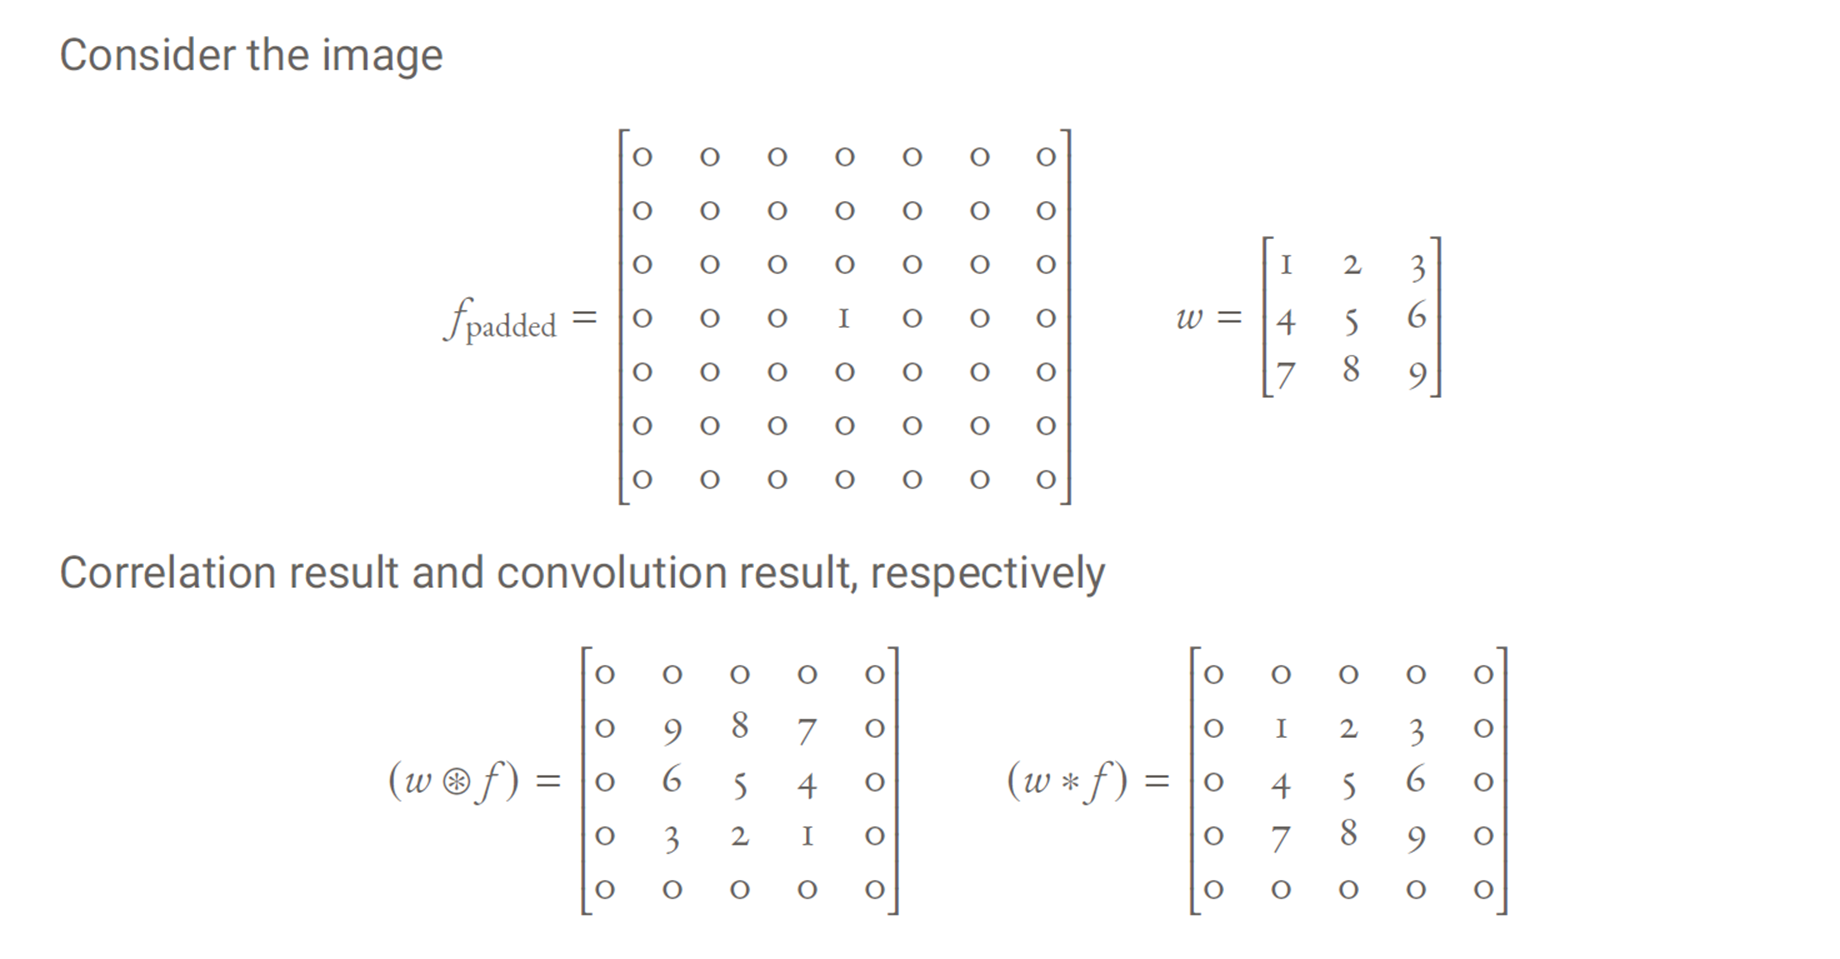

Properties of convolution:
* Commutative: $ f * g = g * f $
* Associative: $ f * (g * h) = (f * g) * h $ Here, it is best to convolve the smaller kernels first to reduce the number of operations.
* Distributive: $ f * (g + h) = f * g + f * h $
* There is no difference between a filter and a signal
* Scalars factor out: $ a(f * g) = (af) * g = f * (ag) $


### At the edge

Convolution has problems at the edge. Right at the border, the convolution kernel doesn't fully overlap with the image. The size of the image considering only the valid cases reduced by:
$$p = \frac{k-1}{2}$$
on each side
where k is the kernel size.

Different techniques such as zero padding, replicate padding, and mirror padding, wrap padding can be used to handle the edge cases.

Gaussian filtering is used to blur images. It uses a Gaussian kernel. Compared to box filters, Gaussian filters smoothen the image more. Any blockiness is not present in Gaussian filters

### Using detected edges to sharpen images

We can use the detected edges to sharpen images. We can add the detected edges to the original image to sharpen it. This is called unsharp masking. The detected edges are multiplied by a factor and added to the original image. This enhances the edges in the image. As a kernel, this can be given by:
$$\begin{bmatrix}
0 & -1 & 0 \\
-1 & 5 & -1 \\
0 & -1 & 0
\end{bmatrix}$$

This is known as the unsharp mask filter. This filter is equivalent to taking the laplacian of the image and adding it to the original image.

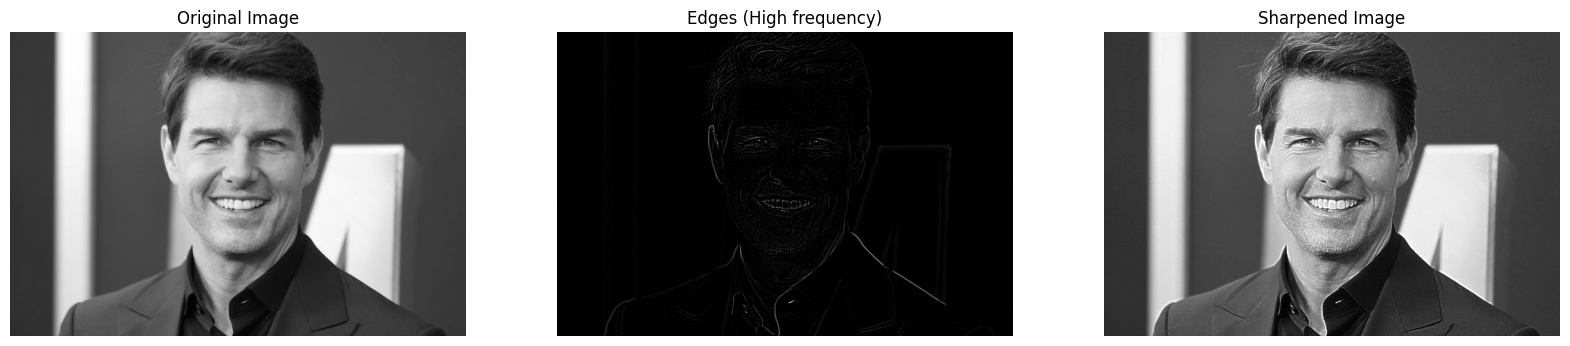

In [15]:
original_image = cv2.imread(str(image_dir/"tom.jpg"), cv2.IMREAD_GRAYSCALE)
smoothed_image = cv2.blur(original_image, (5,5))
lowpassimage = cv2.subtract(original_image, smoothed_image) # We subtract the blurred image which results in the high frequency components
sharp_image = cv2.add(original_image, 3*lowpassimage) # We add more high frequency components to the original image
fig, ax = plt.subplots(1, 3, figsize=(20, 12))
ax[0].imshow(original_image, cmap = 'gray')
ax[0].axis("off")
ax[0].set_title("Original Image")
ax[1].imshow(lowpassimage, cmap = 'gray')
ax[1].axis("off")
ax[1].set_title("Edges (High frequency)")
ax[2].imshow(sharp_image, cmap = 'gray')
ax[2].axis("off")
ax[2].set_title("Sharpened Image")
plt.show()

### Noise

Noise can be Gaussian. Gaussian noise, also known as normal noise, is a type of statistical noise having a probability density function (PDF) equal to that of the normal distribution, also known as the Gaussian distribution

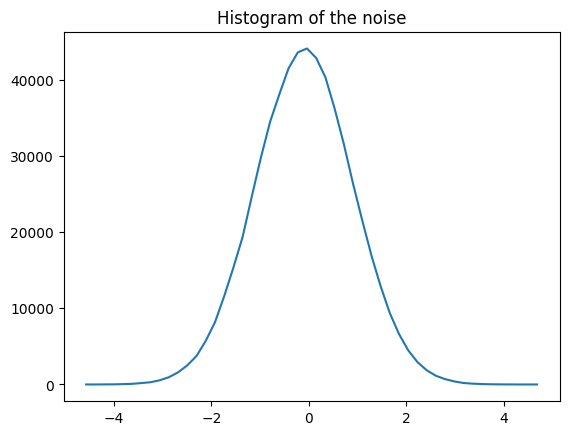

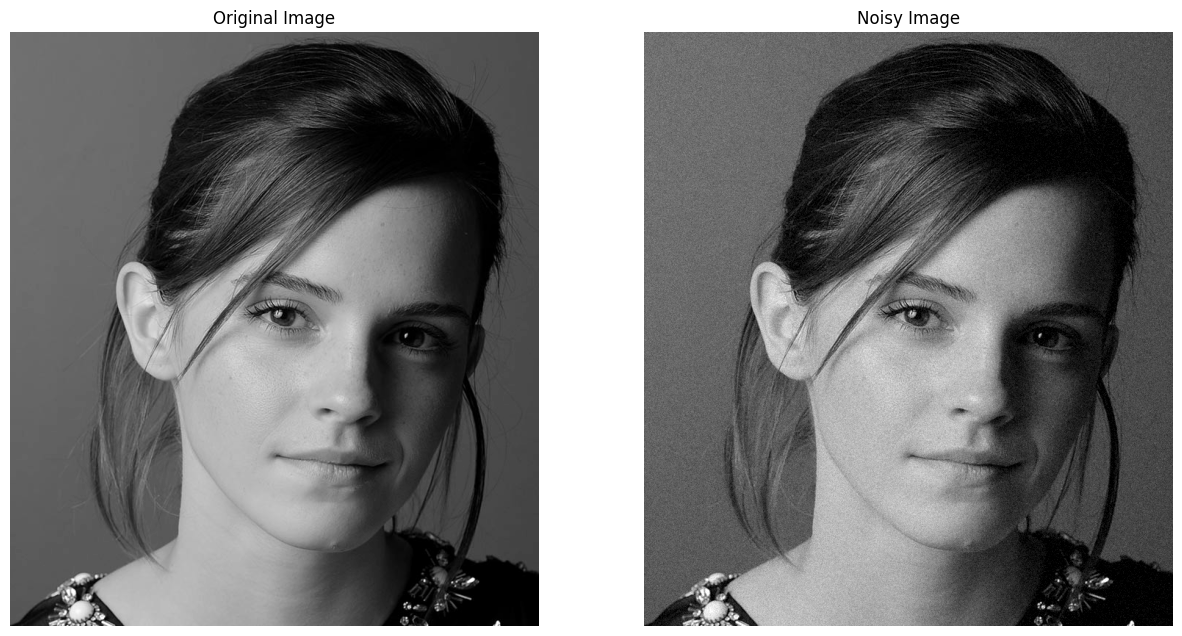

In [23]:
image = cv2.imread(str(image_dir/"emma.jpg"), cv2.IMREAD_GRAYSCALE)
width = image.shape[1]
height = image.shape[0]
noise = np.random.normal(loc = 0, scale = 1, size = (height, width)) # loc is the mean and scale is the variance of the noise
noise_hist = np.histogram(noise, bins = 50)
plt.plot(noise_hist[1][:-1], noise_hist[0])
plt.title("Histogram of the noise")
plt.show()
noisy_image = image + 10 * noise
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(image, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].axis("off")
ax[0].set_title("Original Image")
ax[1].imshow(noisy_image, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].axis("off")
ax[1].set_title("Noisy Image")
plt.show()

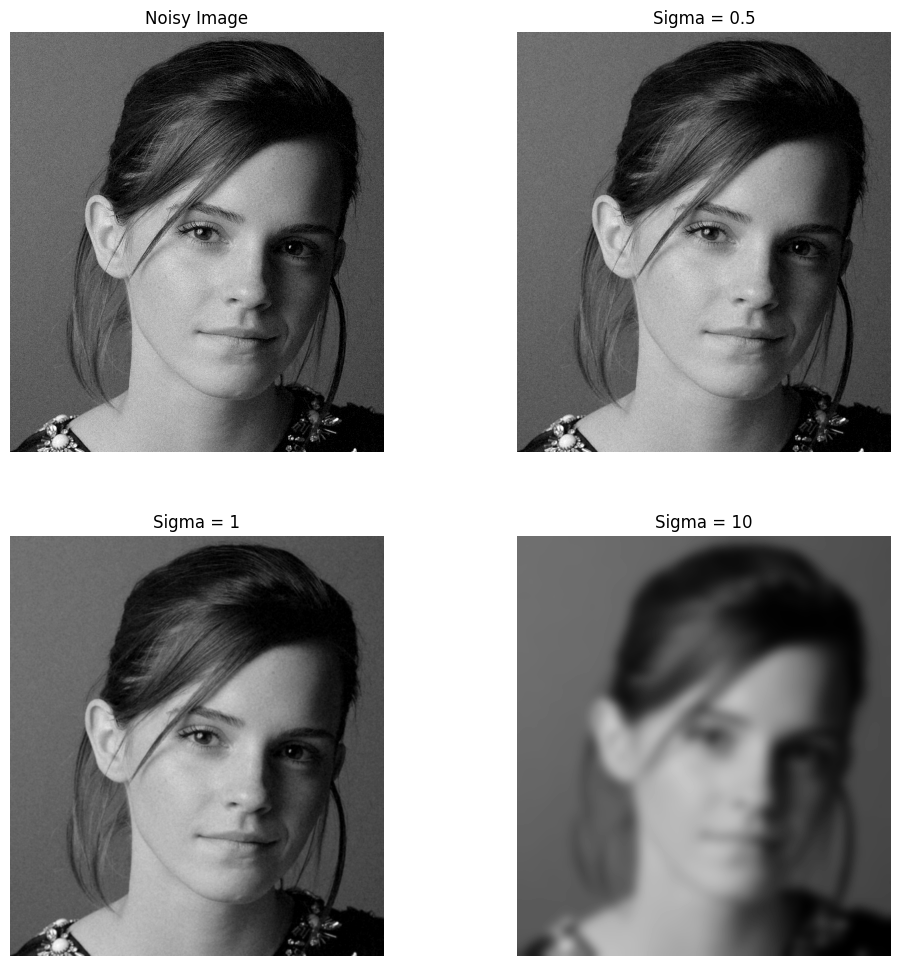

In [8]:
sigma_values = [0.5,1,10]
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
ax[0][0].imshow(noisy_image, cmap = 'gray', vmin = 0, vmax = 255)
ax[0][0].axis("off")
ax[0][0].set_title("Noisy Image")
for sigma in sigma_values:
    filtered_image = cv2.GaussianBlur(noisy_image, (0,0), sigma)
    ax[(sigma_values.index(sigma) + 1)//2][(sigma_values.index(sigma)+1)%2].imshow(filtered_image, cmap = 'gray', vmin = 0, vmax = 255)
    ax[(sigma_values.index(sigma) + 1)//2][(sigma_values.index(sigma)+1)%2].axis("off")
    ax[(sigma_values.index(sigma) + 1)//2][(sigma_values.index(sigma)+1)%2].set_title(f"Sigma = {sigma}")
plt.show()

As shown above, increasing the standard deviation of the filter decreases the noise in the image but also blurs it

### Median Blur

Median blur is a non-linear filter. For each pixel, the meadian value of the neighborhood is taken. This is useful for removing salt and pepper noise. It is more effective than Gaussian blur for this type of noise.

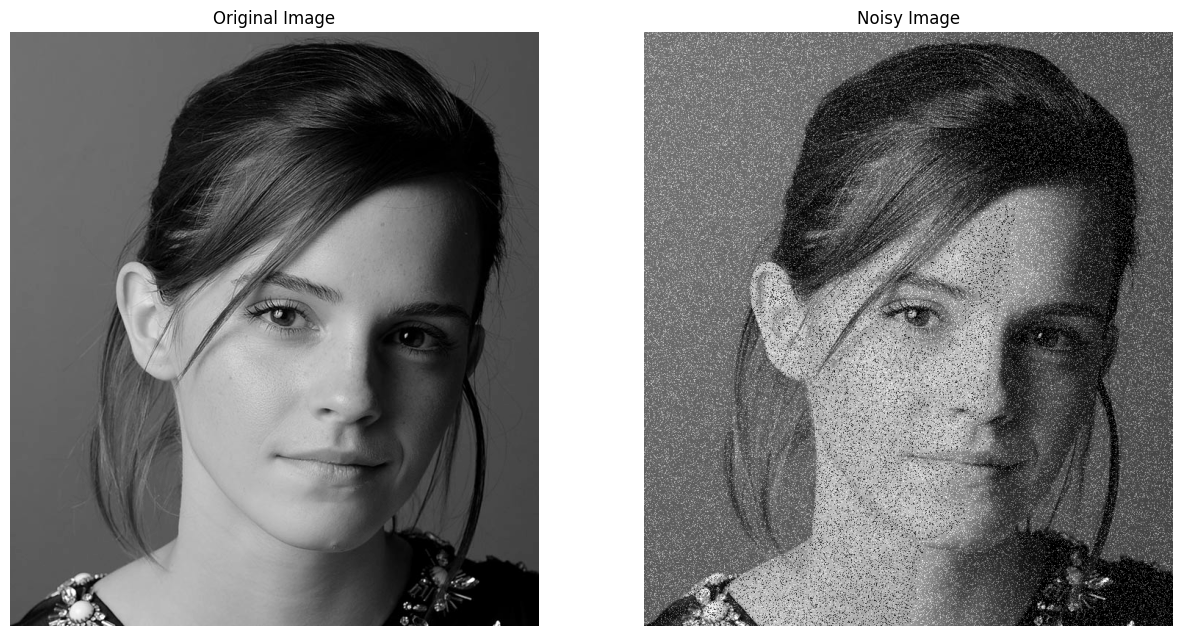

In [9]:
image = cv2.imread(str(image_dir/"emma.jpg"), cv2.IMREAD_GRAYSCALE)
width = image.shape[1]
height = image.shape[0]
salt_pepper = np.random.choice([0, 1, 2], (height, width), p=[0.8, 0.1, 0.1])
noisy_image = image + 50 * salt_pepper
noisy_image = noisy_image.astype(np.uint8)
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(image, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].axis("off")
ax[0].set_title("Original Image")
ax[1].imshow(noisy_image, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].axis("off")
ax[1].set_title("Noisy Image")
plt.show()

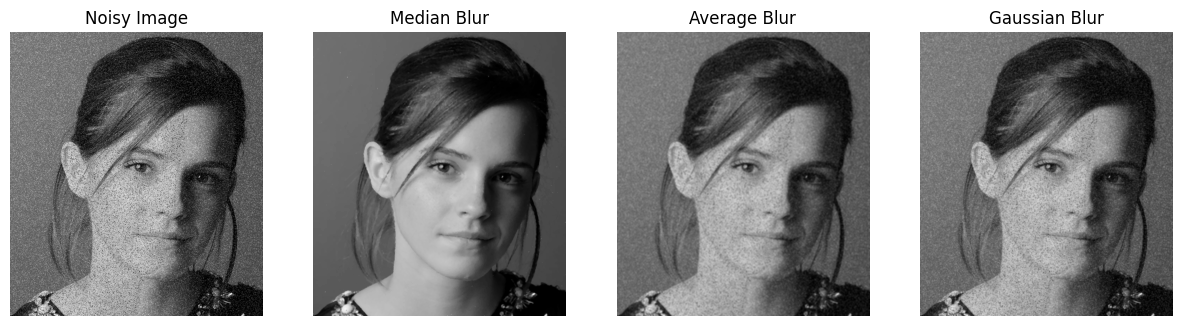

In [10]:
filtered_image = cv2.medianBlur(noisy_image, 5)
average_image = cv2.blur(noisy_image, (5,5))
gaussian_blur = cv2.GaussianBlur(noisy_image, (5,5), 0)
fig, ax = plt.subplots(1, 4, figsize=(15, 8))
ax[0].imshow(noisy_image, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].axis("off")
ax[0].set_title("Noisy Image")
ax[1].imshow(filtered_image, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].axis("off")
ax[1].set_title("Median Blur")
ax[2].imshow(average_image, cmap = 'gray', vmin = 0, vmax = 255)
ax[2].axis("off")
ax[2].set_title("Average Blur")
ax[3].imshow(gaussian_blur, cmap = 'gray', vmin = 0, vmax = 255)
ax[3].axis("off")
ax[3].set_title("Gaussian Blur")
plt.show()

As shown above, median blur does a good job of removing salt and pepper while preserving edges in the  while both average blur and Gaussian blur do not do a good job of removing salt and pepper noise.

### Gaussian filters

Gaussian filters are used to blur images. Gaussian filters are better than box filters because they smoothen the image wheras box filters don't. Any blockiness which is present in box filters is not present in Gaussian filters.

The equation of a Gaussian kernel is:

$$G(x, y) = \frac{1}{2\pi\sigma^2}e^{-\frac{x^2 + y^2}{2\sigma^2}}$$

where $\sigma$ is the standard deviation of the Gaussian distribution. The standard deviation controls the amount of blur in the image. A higher standard deviation results in more blur. $x$ and $y$ are the distances from the center of the kernel.

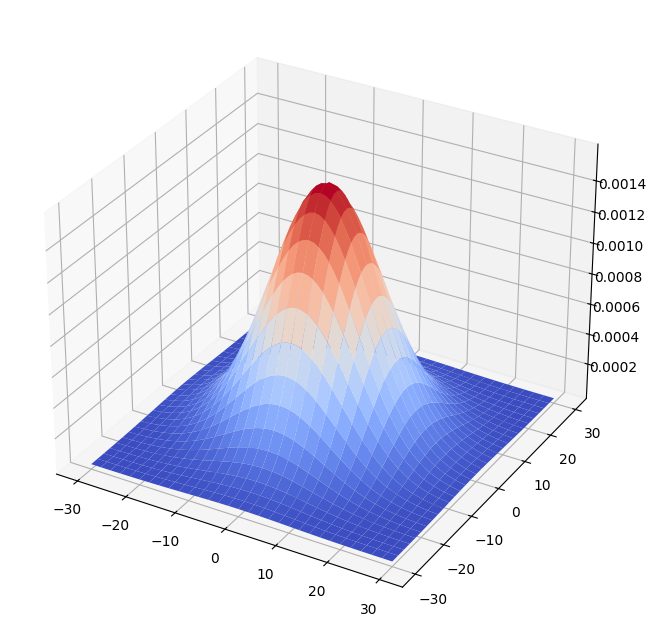

In [26]:
sigma = 10
half_width = 30 # kerenl of size 60
# half width is 3*sigma as a rule of thumb.
# if too low, it doesn't go to 0
# if too high, it is too narrow
x = np.linspace(start = -half_width, stop = half_width, num = 2*half_width+1)
y = np.linspace(start = -half_width, stop = half_width, num = 2*half_width+1)
# print(x)
# print(y)
X, Y = np.meshgrid(x, y)
# print(X)
# print(Y)

G = 1/(2*np.pi*sigma**2)*np.exp(-(X**2 + Y**2)/2/sigma**2)
G = G/np.sum(G) # Normalizing the kernel
# print(G)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, G, cmap = 'coolwarm')
plt.show()

Half width is $3 \times \sigma$ as a rule of thumb. If too low, it doesn't go to 0. If too high, it is too narrow

In [36]:
sigma = 1

gaussian_kernel = cv2.getGaussianKernel(ksize = 5, sigma = sigma)
gaussian_kernel = gaussian_kernel @ gaussian_kernel.T
print(gaussian_kernel)

gaussian_kernel = np.zeros((5,5))
for i in range(5):
    for j in range(5):
        gaussian_kernel[i,j] = 1/(2*np.pi*sigma**2)*np.exp(-((i-2)**2 + (j-2)**2)/2/sigma**2)

gaussian_kernel = gaussian_kernel/np.sum(gaussian_kernel)
print(gaussian_kernel)

[[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.02193823 0.09832033 0.16210282 0.09832033 0.02193823]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]]
[[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.02193823 0.09832033 0.16210282 0.09832033 0.02193823]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]]


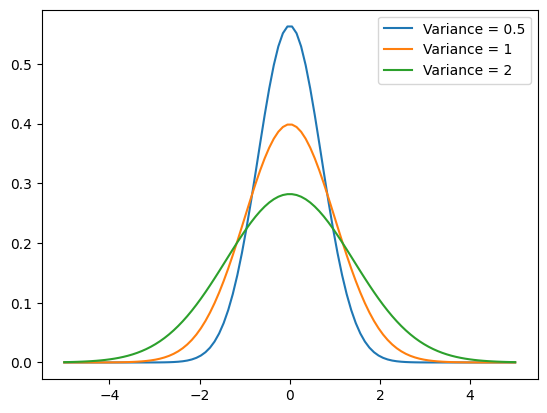

In [20]:
# Plot a 2D Gaussian
mean = 0
variance = [0.5, 1, 2]
for var in variance:
    sigma = np.sqrt(var)
    x = np.linspace(start = -5, stop = 5, num = 100)
    y = 1/(sigma*np.sqrt(2*np.pi))*np.exp(-0.5*(x-mean)**2/sigma**2)
    plt.plot(x, y, label = f"Variance = {var}")
plt.legend()
plt.show()

### Seperability of Gaussian filters

Gaussian filters are separable. This means that we can apply the filter in the x-direction and then in the y-direction. This is faster than applying the filter in 2D. The 2D filter is a matrix multiplication, which is $O(n^2)$. The 1D filter is a vector multiplication, which is $O(n)$. The 1D filter is faster than the 2D filter.

The inner product is a simple dot product. Outer product is the opposite of the dot product. It is a matrix multiplication.

The complexity of filtering an $n*n$ image with an $m*m$ kernel is $O(n^2*m^2).$ If the kernel is separable, the complexity is $O(n^2*m).$

In [2]:
sobel_y = np.array([[1, 2, 1], 
                    [0, 0, 0], 
                    [-1, -2, -1]])

sobel_x = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]])

a = np.array([1,0,-1])
b = np.array([1,2,1])

sobel_x_new = np.dot(b[:,None],a[None,:])
print(sobel_x_new)
sobel_y_new = np.outer(a,b)
print(sobel_y_new)

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


A kernel is seperable if it's rank is 1. That is, the number of linearly independent columns is 1.

Please check out [this](https://math.stackexchange.com/questions/1545118/a-rank-one-matrix-is-the-product-of-two-vectors) question on stack exchange to see how a rank-1 matrix is the product of two vectors.

3D Gaussian splatting is used in computer graphics to render points. The points are rendered as spheres. The spheres are rendered as 3D Gaussians. The 3D Gaussians are rendered as 2D Gaussians. The 2D Gaussians are rendered as pixels. The pixels are rendered as points. This is called 3D Gaussian splatting.